# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_1 = sinasc[['QTDPARTNOR', 'QTDGESTANT','munResLat', 'CONSULTAS', 'munResAlt', 'munResArea']].copy()

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
lat = pd.cut(sinasc['munResLat'], [-13.3, -10.5 ,-8.8])

In [5]:
sinasc_1.pivot_table(values= ['QTDPARTNOR'],
                     index=['munResLat', lat],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)


QTDPARTNOR                               ...         \
                               amax             amin              ... sum      
CONSULTAS                         1  2  3  4  9    1  2  3  4  9  ...   1  2   
munResLat munResLat                                               ...          
-13.49976 (-13.3, -10.5]          0  0  0  0  0    0  0  0  0  0  ...   0  0   
          (-10.5, -8.8]           0  0  0  0  0    0  0  0  0  0  ...   0  0   
-13.47656 (-13.3, -10.5]          0  0  0  0  0    0  0  0  0  0  ...   0  0   
          (-10.5, -8.8]           0  0  0  0  0    0  0  0  0  0  ...   0  0   
-13.19503 (-13.3, -10.5]          0  1  7  8  0    0  0  0  0  0  ...   0  3   
...                             ... .. .. .. ..  ... .. .. .. ..  ...  .. ..   
-9.19187  (-10.5, -8.8]           1  2  4  6  0    0  2  0  0  0  ...   5  2   
-8.78502  (-13.3, -10.5]          0  0  0  0  0    0  0  0  0  0  ...   0  0   
          (-10.5, -8.8]           0  0  0  0  0    0  0  0  0  0  ...   0  0   
-8.76889  (-13.3, -10.5]          0  0  0  0  0    0  0  0  0  0  ...   0  0   
          (-10.5, -8.8]           0  0  0  0  0    0  0  0  0  0  ...   0  0   

                                                                              
                                          var                                 
CONSULTAS                  3   4  9         1     2         3         4    9  
munResLat munResLat                                                           
-13.49976 (-13.3, -10.5]   0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]    0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
-13.47656 (-13.3, -10.5]   0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]    0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
-13.19503 (-13.3, -10.5]  14  57  0  0.000000  0.25  1.380488  0.681727  0.0  
...                       ..  .. ..       ...   ...       ...       ...  ...  
-9.19187  (-10.5, -8.8]   10  87  0  0.267857  0.00  2.222222  2.363503  0.0  
-8.78502  (-13.3, -10.5]   0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]    0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
-8.76889  (-13.3, -10.5]   0   0  0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]    0   0  0  0.000000  0.00  0.000000  0.000000  0.0  

[104 rows x 35 columns]

In [6]:
sinasc_1.pivot_table(values= ['QTDGESTANT'],
                     index=['munResLat', lat],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)


QTDGESTANT                                ...      \
                               amax              amin              ... sum   
CONSULTAS                         1  2  3   4  9    1  2  3  4  9  ...   1   
munResLat munResLat                                                ...       
-13.49976 (-13.3, -10.5]          0  0  0   0  0    0  0  0  0  0  ...   0   
          (-10.5, -8.8]           0  0  0   0  0    0  0  0  0  0  ...   0   
-13.47656 (-13.3, -10.5]          0  0  0   0  0    0  0  0  0  0  ...   0   
          (-10.5, -8.8]           0  0  0   0  0    0  0  0  0  0  ...   0   
-13.19503 (-13.3, -10.5]          1  3  7   8  0    0  2  0  0  0  ...   1   
...                             ... .. ..  .. ..  ... .. .. .. ..  ...  ..   
-9.19187  (-10.5, -8.8]           3  2  4  52  0    0  2  0  0  0  ...  10   
-8.78502  (-13.3, -10.5]          0  0  0   0  0    0  0  0  0  0  ...   0   
          (-10.5, -8.8]           0  0  0   0  0    0  0  0  0  0  ...   0   
-8.76889  (-13.3, -10.5]          0  0  0   0  0    0  0  0  0  0  ...   0   
          (-10.5, -8.8]           0  0  0   0  0    0  0  0  0  0  ...   0   

                                                                        \
                                               var                       
CONSULTAS                  2   3    4  9         1         2         3   
munResLat munResLat                                                      
-13.49976 (-13.3, -10.5]   0   0    0  0  0.000000  0.000000  0.000000   
          (-10.5, -8.8]    0   0    0  0  0.000000  0.000000  0.000000   
-13.47656 (-13.3, -10.5]   0   0    0  0  0.000000  0.000000  0.000000   
          (-10.5, -8.8]    0   0    0  0  0.000000  0.000000  0.000000   
-13.19503 (-13.3, -10.5]  10  62  220  0  0.333333  0.333333  1.956098   
...                       ..  ..  ... ..       ...       ...       ...   
-9.19187  (-10.5, -8.8]    2  22  185  0  1.071429  0.000000  2.177778   
-8.78502  (-13.3, -10.5]   0   0    0  0  0.000000  0.000000  0.000000   
          (-10.5, -8.8]    0   0    0  0  0.000000  0.000000  0.000000   
-8.76889  (-13.3, -10.5]   0   0    0  0  0.000000  0.000000  0.000000   
          (-10.5, -8.8]    0   0    0  0  0.000000  0.000000  0.000000   

                                          
                                          
CONSULTAS                         4    9  
munResLat munResLat                       
-13.49976 (-13.3, -10.5]   0.000000  0.0  
          (-10.5, -8.8]    0.000000  0.0  
-13.47656 (-13.3, -10.5]   0.000000  0.0  
          (-10.5, -8.8]    0.000000  0.0  
-13.19503 (-13.3, -10.5]   1.328143  0.0  
...                             ...  ...  
-9.19187  (-10.5, -8.8]   34.044715  0.0  
-8.78502  (-13.3, -10.5]   0.000000  0.0  
          (-10.5, -8.8]    0.000000  0.0  
-8.76889  (-13.3, -10.5]   0.000000  0.0  
          (-10.5, -8.8]    0.000000  0.0  

[104 rows x 35 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
area = pd.cut(sinasc['munResArea'],[0,3000,999999])

In [8]:
sinasc_1.pivot_table(values= ['QTDPARTNOR'],
                     index=['munResArea', area],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)

QTDPARTNOR                                  ...  \
                                amax                amin              ...   
CONSULTAS                          1   2   3   4  9    1  2  3  4  9  ...   
munResArea munResArea                                                 ...   
459.978    (0, 3000]               0   6   2   2  0    0  6  0  0  0  ...   
           (3000, 999999]          0   0   0   0  0    0  0  0  0  0  ...   
541.647    (0, 3000]               0   0   5   2  0    0  0  0  0  0  ...   
           (3000, 999999]          0   0   0   0  0    0  0  0  0  0  ...   
605.692    (0, 3000]               0   0   2   2  0    0  0  0  0  0  ...   
...                              ...  ..  ..  .. ..  ... .. .. .. ..  ...   
11518.915  (3000, 999999]          3   6   4   9  0    0  0  0  0  0  ...   
24855.724  (0, 3000]               0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 999999]         10  10   9  10  0    0  0  0  0  0  ...   
34096.394  (0, 3000]               0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 999999]         12   9  40  14  6    0  0  0  0  0  ...   

                                                                         \
                           sum                            var             
CONSULTAS                    1    2     3     4   9         1         2   
munResArea munResArea                                                     
459.978    (0, 3000]         0    6     2     6   0  0.000000  0.000000   
           (3000, 999999]    0    0     0     0   0  0.000000  0.000000   
541.647    (0, 3000]         0    0     7     8   0  0.000000  0.000000   
           (3000, 999999]    0    0     0     0   0  0.000000  0.000000   
605.692    (0, 3000]         0    0     3    13   0  0.000000  0.000000   
...                        ...  ...   ...   ...  ..       ...       ...   
11518.915  (3000, 999999]    6   35    95   386   0  0.879121  1.557692   
24855.724  (0, 3000]         0    0     0     0   0  0.000000  0.000000   
           (3000, 999999]   59  230   391   267   0  4.542091  4.131644   
34096.394  (0, 3000]         0    0     0     0   0  0.000000  0.000000   
           (3000, 999999]  458  633  1913  2680  32  2.056210  2.147366   

                                                         
                                                         
CONSULTAS                         3         4         9  
munResArea munResArea                                    
459.978    (0, 3000]       1.333333  0.127411  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
541.647    (0, 3000]       2.677778  0.206736  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
605.692    (0, 3000]       0.700000  0.351587  0.000000  
...                             ...       ...       ...  
11518.915  (3000, 999999]  0.677473  0.674822  0.000000  
24855.724  (0, 3000]       0.000000  0.000000  0.000000  
           (3000, 999999]  3.275574  1.886115  0.000000  
34096.394  (0, 3000]       0.000000  0.000000  0.000000  
           (3000, 999999]  2.815816  1.289723  1.898925  

[104 rows x 35 columns]

In [9]:
sinasc_1.pivot_table(values= ['QTDGESTANT'],
                     index=['munResArea', area],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)

QTDGESTANT                                  ...  \
                                amax                amin              ...   
CONSULTAS                          1   2   3   4  9    1  2  3  4  9  ...   
munResArea munResArea                                                 ...   
459.978    (0, 3000]               2   6   2   4  0    2  6  1  0  0  ...   
           (3000, 999999]          0   0   0   0  0    0  0  0  0  0  ...   
541.647    (0, 3000]               1   0   7   2  0    1  0  0  0  0  ...   
           (3000, 999999]          0   0   0   0  0    0  0  0  0  0  ...   
605.692    (0, 3000]               0   0   4   3  0    0  0  0  0  0  ...   
...                              ...  ..  ..  .. ..  ... .. .. .. ..  ...   
11518.915  (3000, 999999]          3   6   5   9  2    0  0  0  0  0  ...   
24855.724  (0, 3000]               0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 999999]         10  11   9  10  3    0  0  0  0  3  ...   
34096.394  (0, 3000]               0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 999999]         12  14  13  12  7    0  0  0  0  0  ...   

                                                                          \
                           sum                             var             
CONSULTAS                    1     2     3     4   9         1         2   
munResArea munResArea                                                      
459.978    (0, 3000]         2     6     5    53   0  0.000000  0.000000   
           (3000, 999999]    0     0     0     0   0  0.000000  0.000000   
541.647    (0, 3000]         1     0    17    26   0  0.000000  0.000000   
           (3000, 999999]    0     0     0     0   0  0.000000  0.000000   
605.692    (0, 3000]         0     0     9    46   0  0.000000  0.000000   
...                        ...   ...   ...   ...  ..       ...       ...   
11518.915  (3000, 999999]   15    84   300  1410   4  0.994505  2.006033   
24855.724  (0, 3000]         0     0     0     0   0  0.000000  0.000000   
           (3000, 999999]  103   299   573   444   3  5.191046  4.508305   
34096.394  (0, 3000]         0     0     0     0   0  0.000000  0.000000   
           (3000, 999999]  887  1058  3300  5449  45  2.753889  2.940085   

                                                         
                                                         
CONSULTAS                         3         4         9  
munResArea munResArea                                    
459.978    (0, 3000]       0.333333  0.954997  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
541.647    (0, 3000]       4.455556  0.583043  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
605.692    (0, 3000]       2.700000  0.720635  0.000000  
...                             ...       ...       ...  
11518.915  (3000, 999999]  1.543828  1.435571  1.066667  
24855.724  (0, 3000]       0.000000  0.000000  0.000000  
           (3000, 999999]  4.039262  2.614697  0.000000  
34096.394  (0, 3000]       0.000000  0.000000  0.000000  
           (3000, 999999]  2.256429  1.748812  2.322581  

[104 rows x 35 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
alti = pd.qcut(sinasc['munResAlt'], 2)

In [11]:
sinasc_1.pivot_table(values= ['QTDPARTNOR'],
                     index=['munResAlt', alti],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)

QTDPARTNOR                                 ...       \
                                amax               amin              ...  sum   
CONSULTAS                          1  2   3   4  9    1  2  3  4  9  ...    1   
munResAlt munResAlt                                                  ...        
85.0      (84.999, 153.0]          7  6  10   7  2    0  0  0  0  0  ...   47   
          (153.0, 595.0]           0  0   0   0  0    0  0  0  0  0  ...    0   
87.0      (84.999, 153.0]         12  9  40  14  6    0  0  0  0  0  ...  458   
          (153.0, 595.0]           0  0   0   0  0    0  0  0  0  0  ...    0   
99.0      (84.999, 153.0]          1  2   4   6  0    0  2  0  0  0  ...    5   
...                              ... ..  ..  .. ..  ... .. .. .. ..  ...  ...   
397.0     (153.0, 595.0]           3  0   4   3  0    0  0  0  0  0  ...    3   
419.0     (84.999, 153.0]          0  0   0   0  0    0  0  0  0  0  ...    0   
          (153.0, 595.0]           1  1   3   8  0    0  0  0  0  0  ...    1   
595.0     (84.999, 153.0]          0  0   0   0  0    0  0  0  0  0  ...    0   
          (153.0, 595.0]           3  6   4   9  0    0  0  0  0  0  ...    6   

                                                                              \
                                                     var                       
CONSULTAS                    2     3     4   9         1         2         3   
munResAlt munResAlt                                                            
85.0      (84.999, 153.0]   26    76   157   2  6.128623  2.490476  2.809256   
          (153.0, 595.0]     0     0     0   0  0.000000  0.000000  0.000000   
87.0      (84.999, 153.0]  633  1913  2680  32  2.056210  2.147366  2.815816   
          (153.0, 595.0]     0     0     0   0  0.000000  0.000000  0.000000   
99.0      (84.999, 153.0]    2    10    87   0  0.267857  0.000000  2.222222   
...                        ...   ...   ...  ..       ...       ...       ...   
397.0     (153.0, 595.0]     0    10    30   0  3.000000  0.000000  1.526316   
419.0     (84.999, 153.0]    0     0     0   0  0.000000  0.000000  0.000000   
          (153.0, 595.0]     2    22    70   0  0.333333  0.194444  1.299160   
595.0     (84.999, 153.0]    0     0     0   0  0.000000  0.000000  0.000000   
          (153.0, 595.0]    35    95   386   0  0.879121  1.557692  0.677473   

                                               
                                               
CONSULTAS                         4         9  
munResAlt munResAlt                            
85.0      (84.999, 153.0]  1.535371  2.000000  
          (153.0, 595.0]   0.000000  0.000000  
87.0      (84.999, 153.0]  1.289723  1.898925  
          (153.0, 595.0]   0.000000  0.000000  
99.0      (84.999, 153.0]  2.363503  0.000000  
...                             ...       ...  
397.0     (153.0, 595.0]   0.331235  0.000000  
419.0     (84.999, 153.0]  0.000000  0.000000  
          (153.0, 595.0]   1.064209  0.000000  
595.0     (84.999, 153.0]  0.000000  0.000000  
          (153.0, 595.0]   0.674822  0.000000  

[98 rows x 35 columns]

In [12]:
sinasc_1.pivot_table(values= ['QTDGESTANT'],
                     index=['munResAlt', alti],
                     columns= ['CONSULTAS'],
                     aggfunc={np.sum,np.min, np.mean, np.max, np.median, np.std, np.var},
                    fill_value=0)

QTDGESTANT                                  ...  \
                                amax                amin              ...   
CONSULTAS                          1   2   3   4  9    1  2  3  4  9  ...   
munResAlt munResAlt                                                   ...   
85.0      (84.999, 153.0]          9   6   7   7  2    0  0  0  0  0  ...   
          (153.0, 595.0]           0   0   0   0  0    0  0  0  0  0  ...   
87.0      (84.999, 153.0]         12  14  13  12  7    0  0  0  0  0  ...   
          (153.0, 595.0]           0   0   0   0  0    0  0  0  0  0  ...   
99.0      (84.999, 153.0]          3   2   4  52  0    0  2  0  0  0  ...   
...                              ...  ..  ..  .. ..  ... .. .. .. ..  ...   
397.0     (153.0, 595.0]           3   1   5   3  0    1  0  0  0  0  ...   
419.0     (84.999, 153.0]          0   0   0   0  0    0  0  0  0  0  ...   
          (153.0, 595.0]           3   3   5   9  0    0  0  0  0  0  ...   
595.0     (84.999, 153.0]          0   0   0   0  0    0  0  0  0  0  ...   
          (153.0, 595.0]           3   6   5   9  2    0  0  0  0  0  ...   

                                                                          \
                           sum                             var             
CONSULTAS                    1     2     3     4   9         1         2   
munResAlt munResAlt                                                        
85.0      (84.999, 153.0]   69    47   115   286   2  7.853261  3.290476   
          (153.0, 595.0]     0     0     0     0   0  0.000000  0.000000   
87.0      (84.999, 153.0]  887  1058  3300  5449  45  2.753889  2.940085   
          (153.0, 595.0]     0     0     0     0   0  0.000000  0.000000   
99.0      (84.999, 153.0]   10     2    22   185   0  1.071429  0.000000   
...                        ...   ...   ...   ...  ..       ...       ...   
397.0     (153.0, 595.0]     5     2    25   130   0  1.333333  0.333333   
419.0     (84.999, 153.0]    0     0     0     0   0  0.000000  0.000000   
          (153.0, 595.0]     5    10    56   183   0  2.333333  1.111111   
595.0     (84.999, 153.0]    0     0     0     0   0  0.000000  0.000000   
          (153.0, 595.0]    15    84   300  1410   4  0.994505  2.006033   

                                                          
                                                          
CONSULTAS                         3          4         9  
munResAlt munResAlt                                       
85.0      (84.999, 153.0]  2.779147   2.141819  2.000000  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
87.0      (84.999, 153.0]  2.256429   1.748812  2.322581  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
99.0      (84.999, 153.0]  2.177778  34.044715  0.000000  
...                             ...        ...       ...  
397.0     (153.0, 595.0]   2.407895   0.941935  0.000000  
419.0     (84.999, 153.0]  0.000000   0.000000  0.000000  
          (153.0, 595.0]   2.070588   1.677512  0.000000  
595.0     (84.999, 153.0]  0.000000   0.000000  0.000000  
          (153.0, 595.0]   1.543828   1.435571  1.066667  

[98 rows x 35 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
imediatas = dict(zip(dados_ro['municipio'],dados_ro['regiao']))

In [14]:
sinasc_2 = sinasc[['IDADEMAE','munResNome', 'CONSULTAS']]
sinasc_3 = sinasc_2.rename(columns={'munResNome':'municipio'}).merge(dados_ro, on='municipio', how='outer')
sinasc_3

,IDADEMAE,municipio,CONSULTAS,regiao,idh,ifdm,pib
0,19,Alta Floresta D'Oeste,4,Cacoal,0.641,0.6337,496000.0
1,29,Alta Floresta D'Oeste,4,Cacoal,0.641,0.6337,496000.0
2,37,Alta Floresta D'Oeste,4,Cacoal,0.641,0.6337,496000.0
3,30,Alta Floresta D'Oeste,4,Cacoal,0.641,0.6337,496000.0
4,33,Alta Floresta D'Oeste,4,Cacoal,0.641,0.6337,496000.0
...,...,...,...,...,...,...,...
27023,26,Cabixi,4,Vilhena,0.650,0.5887,113031.0
27024,30,Cabixi,4,Vilhena,0.650,0.5887,113031.0
27025,22,Cabixi,4,Vilhena,0.650,0.5887,113031.0
27026,32,Cabixi,4,Vilhena,0.650,0.5887,113031.0


In [15]:
sinasc_2 = sinasc[['IDADEMAE','munResNome']]
graf_idade = sinasc_2.set_index('munResNome').groupby(imediatas).mean()
graf_idade

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


<AxesSubplot:xlabel='munResNome'>

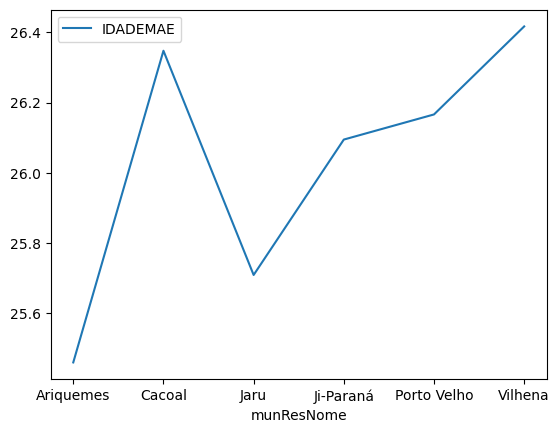

In [16]:
graf_idade.plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).

In [17]:
sinasc_4 = sinasc_3.dropna().set_index('municipio')

In [31]:
faixa_idh = [0.000, 0.499 ,0.599,0.699,0.799,1.0]
cat_idh = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']
idh = pd.cut(sinasc_4.idh, faixa_idh, labels=cat_idh)

sinasc_idh = sinasc_4.groupby(idh).mean()
sinasc_idh.dropna()

,IDADEMAE,CONSULTAS,idh,ifdm,pib
idh,,,,,
IDH baixo,25.326944,3.641292,0.591949,0.528481,3.782186e+05
IDH médio,25.884855,3.663551,0.649948,0.607831,5.822012e+05
IDH alto,26.280332,3.526372,0.724795,0.727540,1.028524e+07


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


O índice varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado:

Alto, resultados superiores a 0,8 pontos;
Moderado, resultados entre 0,6 e 0,8 pontos;
Regular, resultados entre 0,4 e 0,6 pontos;
Baixo, resultados inferiores a 0,4 pontos;

In [32]:
faixa_ifdm = [0.000, 0.399 ,0.599,0.799,1.0]
cat_ifdm = ['IFDM baixo', 'IFDM regular', 'IFDM moderado', 'IFDM alto']
ifdm = pd.cut(sinasc_4.ifdm, faixa_ifdm, labels=cat_ifdm)

sinasc_ifdm = sinasc_4.groupby(ifdm).mean()
sinasc_ifdm.dropna()

,IDADEMAE,CONSULTAS,idh,ifdm,pib
ifdm,,,,,
IFDM regular,25.326944,3.641292,0.591949,0.528481,3.782186e+05
IFDM moderado,26.082594,3.594962,0.687372,0.667685,5.433719e+06


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


Acima de 1 Bilhão
Acima de 500 Milhões
Acima de 300 Milhões
Acima de 200 Milhões
Acima de 100 Milhões
Até 100 Milhões

In [35]:
faixa_pib = [0.000,99999,100000 ,200000,300000,500000, 1000000,9999999]
cat_pib = ['Até 100 Milhões', ' Acima de 100 Milhões', 'Acima de 200 Milhões', 'Acima de 300 Milhões', ' Acima de 300 Milhões'
          ,'Acima de 500 Milhões','Acima de 1 Bilhão']
pib = pd.cut(sinasc_4.pib, faixa_pib, labels=cat_pib)

sinasc_pib = sinasc_4.groupby(pib).mean()
sinasc_pib.dropna()

,IDADEMAE,CONSULTAS,idh,ifdm,pib
pib,,,,,
Acima de 300 Milhões,25.326944,3.641292,0.591949,0.528481,378218.590909
Acima de 500 Milhões,25.884855,3.663551,0.649948,0.607831,582201.172538


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Nas cidades de IDH mais alto a média de idade das mães é mais alta (26,28 anos), é possível notar também que a média de consultas de pré-natal é maior para municípios de IDH médio ou baixo talvez haja correlação de que em municípios com maior IDH as pacientes miguem para o sistema privado de saúde para realização das suas consultas de pré-natal. 